In [191]:
import os
import random
import peppi_py as peppi
from fax.paths import PATHS

import numpy as np
import matplotlib.pyplot as plt

In [192]:
replay = random.choice(list(PATHS.replays.glob("*.slp")))
print(f"Selected replay: {replay}")
print(f"Replay size: {os.path.getsize(replay) / 1e6:.2f} MB")
# replay = "/home/jdham/Desktop/Game_20250524T135720.slp"  # <-- working

game = peppi.read_slippi(str(replay))
# i've been getting the following errors for some replays:
# - TypeError: 'NoneType' object cannot be converted to 'PyDict'
# - I/O error: failed to fill the whole buffer

print(f"players: {game.metadata['players']}")

Selected replay: /home/jdham/Desktop/Game_20250527T193830.slp
Replay size: 1.41 MB
players: {'1': {'names': {}, 'characters': {'1': 4137}}, '0': {'names': {}, 'characters': {'1': 4137}}}


In [193]:
pp1 = game.frames.ports[0].leader.post.position
pp2 = game.frames.ports[1].leader.post.position

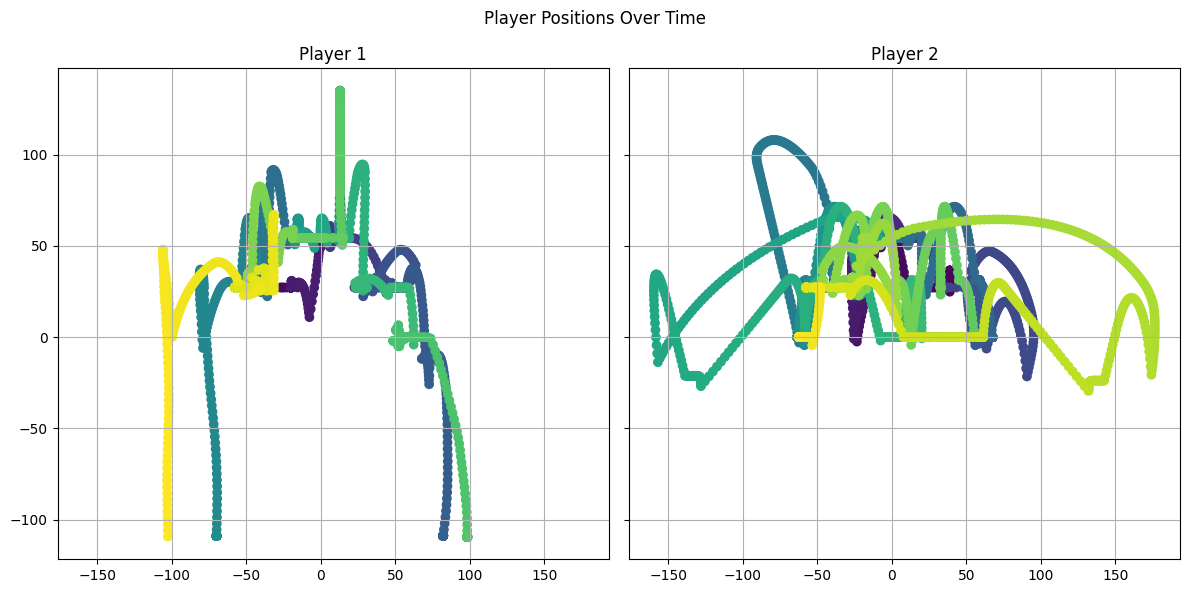

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
ax1.scatter(pp1.x, pp1.y, c=np.arange(len(pp1.x)), cmap='viridis')
ax2.scatter(pp2.x, pp2.y, c=np.arange(len(pp2.x)), cmap='viridis')
ax1.set_title("Player 1")
ax2.set_title("Player 2")
ax1.grid(True)
ax2.grid(True)
fig.suptitle("Player Positions Over Time")
fig.tight_layout()